In [ ]:
!pip install mne


In [ ]:
!pip install vtk

In [ ]:
!pip install pyvista

In [ ]:
!pip install autoreject

In [ ]:
!pip install h5io

In [ ]:
!pip install xgboost

In [1]:
import mne
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
from mne import io, pick_types, read_events, Epochs, EvokedArray, create_info
from mne.preprocessing import Xdawn
from collections import OrderedDict
from mne.decoding import (SlidingEstimator, GeneralizingEstimator, Scaler,
                          cross_val_multiscore, LinearModel, get_coef,
                          Vectorizer, CSP)
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, LeakyReLU
from tensorflow.keras.layers import Flatten, Activation, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

import glob
matplotlib.use('Qt5Agg')
mne.set_config('MNE_BROWSE_RAW_SIZE','20,20')
%matplotlib qt
mne.viz.set_3d_backend("notebook")
plt.rcParams["figure.figsize"] = [20,20]
mne.set_log_level('warning')

Using notebook 3d backend.



In [ ]:
#glob.glob('C:/Users/vs21542/EEG/ane_SD_EMG_1010/ane_SD_EMG_1010/*.vhdr')

In [4]:
raw_ec = mne.io.read_raw_brainvision('C:/Users/vs21542/EEG/ane_SD_EMG_1010/ane_SD_EMG_1010_awake_rest_ec.vhdr', preload=True)
#raw_ec = mne.io.read_raw_brainvision('D:/Vikas/Data Science/Dissertation/Dataset/Kongsberg_anesthesia_data/EEG/ane_SD_EMG_1010/ane_SD_EMG_1010_awake_rest_ec.vhdr', preload=True)

raw_eo = mne.io.read_raw_brainvision('C:/Users/vs21542/EEG/ane_SD_EMG_1010/ane_SD_EMG_1010_awake_rest_eo.vhdr', preload=True)
#raw_eo = mne.io.read_raw_brainvision('D:/Vikas/Data Science/Dissertation/Dataset/Kongsberg_anesthesia_data/EEG/ane_SD_EMG_1010/ane_SD_EMG_1010_awake_rest_eo.vhdr', preload=True)

raw_sed_1 = mne.io.read_raw_brainvision('C:/Users/vs21542/EEG/ane_SD_EMG_1010/ane_SD_EMG_1010_SED_1.vhdr', preload=True)
#raw_sed_1 = mne.io.read_raw_brainvision('D:/Vikas/Data Science/Dissertation/Dataset/Kongsberg_anesthesia_data/EEG/ane_SD_EMG_1010/ane_SD_EMG_1010_sed_1.vhdr', preload=True)

raw_sed_2 = mne.io.read_raw_brainvision('C:/Users/vs21542/EEG/ane_SD_EMG_1010/ane_SD_EMG_1010_SED_2.vhdr', preload=True)
#raw_sed_2 = mne.io.read_raw_brainvision('D:/Vikas/Data Science/Dissertation/Dataset/Kongsberg_anesthesia_data/EEG/ane_SD_EMG_1010/ane_SD_EMG_1010_sed_2.vhdr', preload=True)

raw_sed_3 = mne.io.read_raw_brainvision('C:/Users/vs21542/EEG/ane_SD_EMG_1010/ane_SD_EMG_1010_SED_3.vhdr', preload=True)
#raw_sed_3 = mne.io.read_raw_brainvision('D:/Vikas/Data Science/Dissertation/Dataset/Kongsberg_anesthesia_data/EEG/ane_SD_EMG_1010/ane_SD_EMG_1010_sed_3.vhdr', preload=True)

In [3]:
raw_eo.info

<Info | 7 non-empty values
 bads: []
 ch_names: Iz, O2, Oz, O1, PO8, PO4, POz, PO3, PO7, P8, P6, P4, P2, Pz, P1, ...
 chs: 65 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2019-11-18 12:55:25 UTC
 nchan: 65
 projs: []
 sfreq: 5000.0 Hz
>

In [ ]:
raw_ec.info

In [ ]:
raw_sed_1.info

##### 1.) Sampling rate is 5000 Hz (i.e., EEG data were sampled 5000 times per second, so we have a data point every 2 ms)

##### 2.) The data were filtered during data collection between 0.00–1000 Hz. (from lowpass to highpass) 

In [ ]:
raw_eo_data = raw_eo.get_data()
print(raw_eo_data.shape)

In [ ]:
raw_eo.__dict__

In [ ]:
raw_ec.__dict__

In [ ]:
raw_sed_1.__dict__

In [5]:
# Marking EOG and EMG channels
raw_eo.set_channel_types({'VEOG': 'eog'})
raw_eo.set_channel_types({'HEOG': 'eog'})
raw_eo.set_channel_types({'EMG': 'emg'})

raw_ec.set_channel_types({'VEOG': 'eog'})
raw_ec.set_channel_types({'HEOG': 'eog'})
raw_ec.set_channel_types({'EMG': 'emg'})

raw_sed_1.set_channel_types({'VEOG': 'eog'})
raw_sed_1.set_channel_types({'HEOG': 'eog'})
raw_sed_1.set_channel_types({'EMG': 'emg'})

raw_sed_2.set_channel_types({'VEOG': 'eog'})
raw_sed_2.set_channel_types({'HEOG': 'eog'})
raw_sed_2.set_channel_types({'EMG': 'emg'})

raw_sed_3.set_channel_types({'VEOG': 'eog'})
raw_sed_3.set_channel_types({'HEOG': 'eog'})
raw_sed_3.set_channel_types({'EMG': 'emg'})

<RawBrainVision | ane_SD_EMG_1010_SED_3.eeg, 65 x 2460600 (492.1 s), ~1.19 GB, data loaded>

In [ ]:
# raw_eo.info['bads'] += ['VEOG','HEOG','EMG']
# raw_ec.info['bads'] += ['VEOG','HEOG','EMG']
# raw_sed_1.info['bads'] += ['VEOG','HEOG','EMG']
# raw_sed_2.info['bads'] += ['VEOG','HEOG','EMG']
# raw_sed_3.info['bads'] += ['VEOG','HEOG','EMG']  

In [ ]:
print(raw_eo.plot(n_channels=62))

In [ ]:
print(raw_ec.plot(n_channels=62))

In [ ]:
print(raw_sed_1.plot(n_channels=62))

In [ ]:
print(raw_sed_2.plot(n_channels=62))

In [ ]:
print(raw_sed_3.plot(n_channels=62))

In [ ]:
print(raw_eo.plot(start=10, duration=20, n_channels=65))

In [ ]:
print(raw_sed_2.plot(start=0, duration=5, n_channels=65, color='brown'))

In [ ]:
fig, ax = plt.subplots(figsize=[15, 5])
start_time = 15
end_time = 16

ax.plot(raw_sed_2.get_data(picks='CP1', tmin=start_time, tmax=end_time).T)
plt.show()

In [ ]:
raw_eo.info['ch_names']

In [ ]:
raw_sed_1.info['ch_names']

In [6]:
# EEG signals topography
montage_kind = "standard_1020"
montage =  mne.channels.make_standard_montage(montage_kind)
raw_eo.set_montage(montage, on_missing='ignore')
raw_ec.set_montage(montage, on_missing='ignore')
raw_sed_1.set_montage(montage, on_missing='ignore')
raw_sed_2.set_montage(montage, on_missing='ignore')
raw_sed_3.set_montage(montage, on_missing='ignore')

<RawBrainVision | ane_SD_EMG_1010_SED_3.eeg, 65 x 2460600 (492.1 s), ~1.19 GB, data loaded>

In [ ]:
raw_sed_1.plot_sensors(ch_type='eeg')

In [ ]:
raw_eo.info['bads']

In [ ]:
print("Eye Open Annotations : ", mne.events_from_annotations(raw_eo))
print("Eye Closed Annotations : ", mne.events_from_annotations(raw_ec))
print("Sed 1 Annotations : ", mne.events_from_annotations(raw_sed_1))
print("Sed 2 Annotations : ", mne.events_from_annotations(raw_sed_2))
print("Sed 3 Annotations : ", mne.events_from_annotations(raw_sed_3))

In [ ]:
events_eo, event_id_eo = mne.events_from_annotations(raw_eo)
mne.viz.plot_events(events_eo, event_id = event_id_eo, sfreq = raw_eo.info['sfreq'])

In [ ]:
events_ec, event_id_ec = mne.events_from_annotations(raw_ec)
mne.viz.plot_events(events_ec, event_id = event_id_ec, sfreq = raw_ec.info['sfreq'])

In [ ]:
events_sed_1, event_id_sed_1 = mne.events_from_annotations(raw_sed_1)
mne.viz.plot_events(events_sed_1, event_id = event_id_sed_1, sfreq = raw_sed_1.info['sfreq'])

In [ ]:
events_sed_2, event_id_sed_2 = mne.events_from_annotations(raw_sed_2)
mne.viz.plot_events(events_sed_2, event_id = event_id_sed_2, sfreq = raw_sed_2.info['sfreq'])

In [ ]:
events_sed_3, event_id_sed_3 = mne.events_from_annotations(raw_sed_3)
mne.viz.plot_events(events_sed_3, event_id = event_id_sed_3, sfreq = raw_sed_3.info['sfreq'])

In [ ]:
raw_eo.to_data_frame()

In [ ]:
fig, ax = plt.subplots(5)
raw_eo.plot_psd(ax = ax[0],
                area_mode='range', 
                fmin = 0.0,
                fmax = 100,
                show=False, 
                average=True)
raw_ec.plot_psd(ax = ax[1],
                area_mode='range', 
                fmin = 0.0,
                fmax = 100,
                show=False, 
                average=True)
raw_sed_1.plot_psd(ax = ax[2],
                area_mode='range', 
                fmin = 0.0,
                fmax = 100,
                show=False, 
                average=True)
raw_sed_2.plot_psd(ax = ax[3],
                area_mode='range', 
                fmin = 0.0,
                fmax = 100, 
                show=False, 
                average=True)
raw_sed_3.plot_psd(ax = ax[4],
                area_mode='range', 
                fmin = 0.0,
                fmax = 100, 
                show=False, 
                average=True)

ax[0].set_title("PSD for eye opened")
ax[1].set_title("PSD for eye closed")
ax[2].set_title("PSD for Sed 1")
ax[3].set_title("PSD for Sed 2")
ax[4].set_title("PSD for Sed 3")

fig.set_tight_layout(True)

In [7]:
# Applying downsampling of from sampling frequency 5000 Hz to 500 Hz.
raw_eo_downsampled = raw_eo.copy().resample(sfreq=500)
raw_ec_downsampled = raw_ec.copy().resample(sfreq=500)
raw_sed_1_downsampled = raw_sed_1.copy().resample(sfreq=500)
raw_sed_2_downsampled = raw_sed_2.copy().resample(sfreq=500) 
raw_sed_3_downsampled = raw_sed_3.copy().resample(sfreq=500)

In [ ]:
raw_eo_downsampled.plot(n_channels=62)
raw_ec_downsampled.plot(n_channels=62)
raw_sed_1_downsampled.plot(n_channels=62)
raw_sed_2_downsampled.plot(n_channels=62)
raw_sed_3_downsampled.plot(n_channels=62)

In [8]:
#Method for Bandpass filter
def filter_raw_data(raw):
    low_cut = 0.1
    hi_cut  = 30
    raw_filt = raw.copy().filter(low_cut, hi_cut)
    return raw_filt

In [ ]:
def filter_psd(raw_filt):
    raw_filt.plot_psd(
                area_mode='range', 
                fmin = 0.0,
                fmax = 100,
                show=False, 
                average=True)

In [9]:
#Applying Bandpass filter on downsampled raw data
raw_eo_filt = filter_raw_data(raw_eo_downsampled)
raw_ec_filt = filter_raw_data(raw_ec_downsampled)
raw_sed_1_filt = filter_raw_data(raw_sed_1_downsampled)
raw_sed_2_filt = filter_raw_data(raw_sed_2_downsampled)
raw_sed_3_filt = filter_raw_data(raw_sed_3_downsampled)

In [ ]:
filter_psd(raw_eo_filt)
filter_psd(raw_ec_filt)
filter_psd(raw_sed_1_filt)
filter_psd(raw_sed_2_filt)
filter_psd(raw_sed_3_filt)

# Filtering in time domain

In [ ]:
raw_eo.plot(start=10, duration=20, n_channels=62)

In [ ]:
#raw_eo.save('D:/Vikas/Data Science/Dissertation/Dataset/Kongsberg_anesthesia_data/EEG/ane_SD_EMG_1016/' + '1016-raw_eo.fif', overwrite=True)

In [ ]:
raw_eo_filt.plot(start=10, duration=20, n_channels=62)

In [ ]:
raw_sed_1_filt.plot(start=15, duration=5, n_channels=62)

In [ ]:
#raw_eo_filt.save('D:/Vikas/Data Science/Dissertation/Dataset/Kongsberg_anesthesia_data/EEG/ane_SD_EMG_1016/' + '1016-filt-raw_eo.fif', overwrite=True)

In [ ]:
def ica_raw_data(raw):
    ica_low_cut = 1.0       # For ICA, we filter out more low-frequency power
    ica_hi_cut  = 30
    raw_ica = raw.copy().filter(ica_low_cut, ica_hi_cut)
    return raw_ica

In [ ]:
raw_eo_ica = ica_raw_data(raw_eo_filt)
raw_ec_ica = ica_raw_data(raw_ec_filt)
raw_sed_1_ica = ica_raw_data(raw_sed_1_filt)
raw_sed_2_ica = ica_raw_data(raw_sed_2_filt)
raw_sed_3_ica = ica_raw_data(raw_sed_3_filt)

In [ ]:
#events_raw_eo_ica, events_raw_eo_ica_id = mne.events_from_annotations(raw_eo_filt)

In [ ]:
def ica_epoch_data(raw_data):    
# Break raw data into 1 s epochs
    t_step = 1.0
    events_raw_ica = mne.make_fixed_length_events(raw_data, duration = t_step)
    epochs_raw_ica = mne.Epochs(raw_data, events_raw_ica,
                        tmin=0.0, tmax=t_step,
                        preload=True,
                        baseline=None)
    return epochs_raw_ica

In [ ]:
raw_eo_ica_epoch = ica_epoch_data(raw_eo)
raw_ec_ica_epoch = ica_epoch_data(raw_ec)
raw_sed_1_ica_epoch = ica_epoch_data(raw_sed_1)
raw_sed_2_ica_epoch = ica_epoch_data(raw_sed_2)
raw_sed_3_ica_epoch = ica_epoch_data(raw_sed_3)

In [ ]:
raw_sed_1_ica_epoch = ica_epoch_data(raw_sed_1_filt)

In [ ]:
raw_eo_ica.plot()

In [ ]:
raw_ec_ica_epoch.plot()

In [ ]:
raw_sed_1_ica_epoch.plot()

In [ ]:
raw_sed_2_ica_epoch.plot()

In [ ]:
raw_sed_3_ica_epoch.plot()

In [ ]:
from autoreject import get_rejection_threshold
def reject_thres_epoch(epoch_data):
    reject = get_rejection_threshold(epoch_data)
    return reject

In [ ]:
reject_eo_thres = reject_thres_epoch(raw_eo_ica_epoch)
print("Reject threshold eye open ",reject_eo_thres)
reject_ec_thres = reject_thres_epoch(raw_ec_ica_epoch)
print("Reject threshold eye closed ",reject_ec_thres)
reject_sed_1_thres = reject_thres_epoch(raw_sed_1_ica_epoch)
print("Reject threshold eye sed 1 ",reject_sed_1_thres)
reject_sed_2_thres = reject_thres_epoch(raw_sed_2_ica_epoch)
print("Reject threshold eye sed 2 ",reject_sed_2_thres)
reject_sed_3_thres = reject_thres_epoch(raw_sed_3_ica_epoch)
print("Reject threshold eye sed 3 ",reject_sed_3_thres)

In [ ]:
# def fit_ica(epoch_raw_ica, reject):
#     # ICA parameters
#     random_state = 42   # ensures ICA is reproducable each time it's run
#     ica_n_components = .99     # Specify n_components as a decimal to set % explained variance
#     t_step = 1.0

#     # Fit ICA
#     ica = mne.preprocessing.ICA(n_components=ica_n_components,random_state=random_state)
#     ica.fit(epoch_raw_ica,reject=reject,tstep=t_step) 

In [ ]:
# fit_ica(raw_eo_ica_epoch,reject_eo_thres)

In [10]:
# Intializing the ICA parameters
random_state = 42 
ica_n_components = .99
t_step = 1.0

In [11]:
# Picking only eeg channels data
picks_eo = mne.pick_types(raw_eo_filt.info, meg=False, eeg=True, eog=False, emg=False, stim=False, exclude='bads')
picks_ec = mne.pick_types(raw_ec_filt.info, meg=False, eeg=True, eog=False, emg=False, stim=False, exclude='bads')
picks_sed_1 = mne.pick_types(raw_sed_1_filt.info, meg=False, eeg=True, eog=False, emg=False, stim=False, exclude='bads')
picks_sed_2 = mne.pick_types(raw_sed_2_filt.info, meg=False, eeg=True, eog=False, emg=False, stim=False, exclude='bads')
picks_sed_3 = mne.pick_types(raw_sed_3_filt.info, meg=False, eeg=True, eog=False, emg=False, stim=False, exclude='bads')

In [12]:
# Fit ICA on eye open state data
ica_eo = mne.preprocessing.ICA(n_components=ica_n_components,random_state=random_state)
#ica_eo.fit(raw_eo_filt)
reconst_raw_eo = raw_eo_filt.copy()
ica_eo.fit(reconst_raw_eo, picks=picks_eo)

Method,fastica
Fit,109 iterations on raw data (150440 samples)
ICA components,7
Explained variance,99.0 %
Available PCA components,62
Channel types,eeg
ICA components marked for exclusion,—


In [ ]:
ica_eo.plot_sources(reconst_raw_eo)

In [13]:
#Excluding bad ICA components from eye open data
ica_eo.exclude = [0,1]

# # find which ICs match the EOG pattern
# eog_indices, eog_scores = ica_eo.find_bads_eog(reconst_raw_eo)
# ica_eo.exclude = eog_indices
ica_eo.exclude

[0, 1]

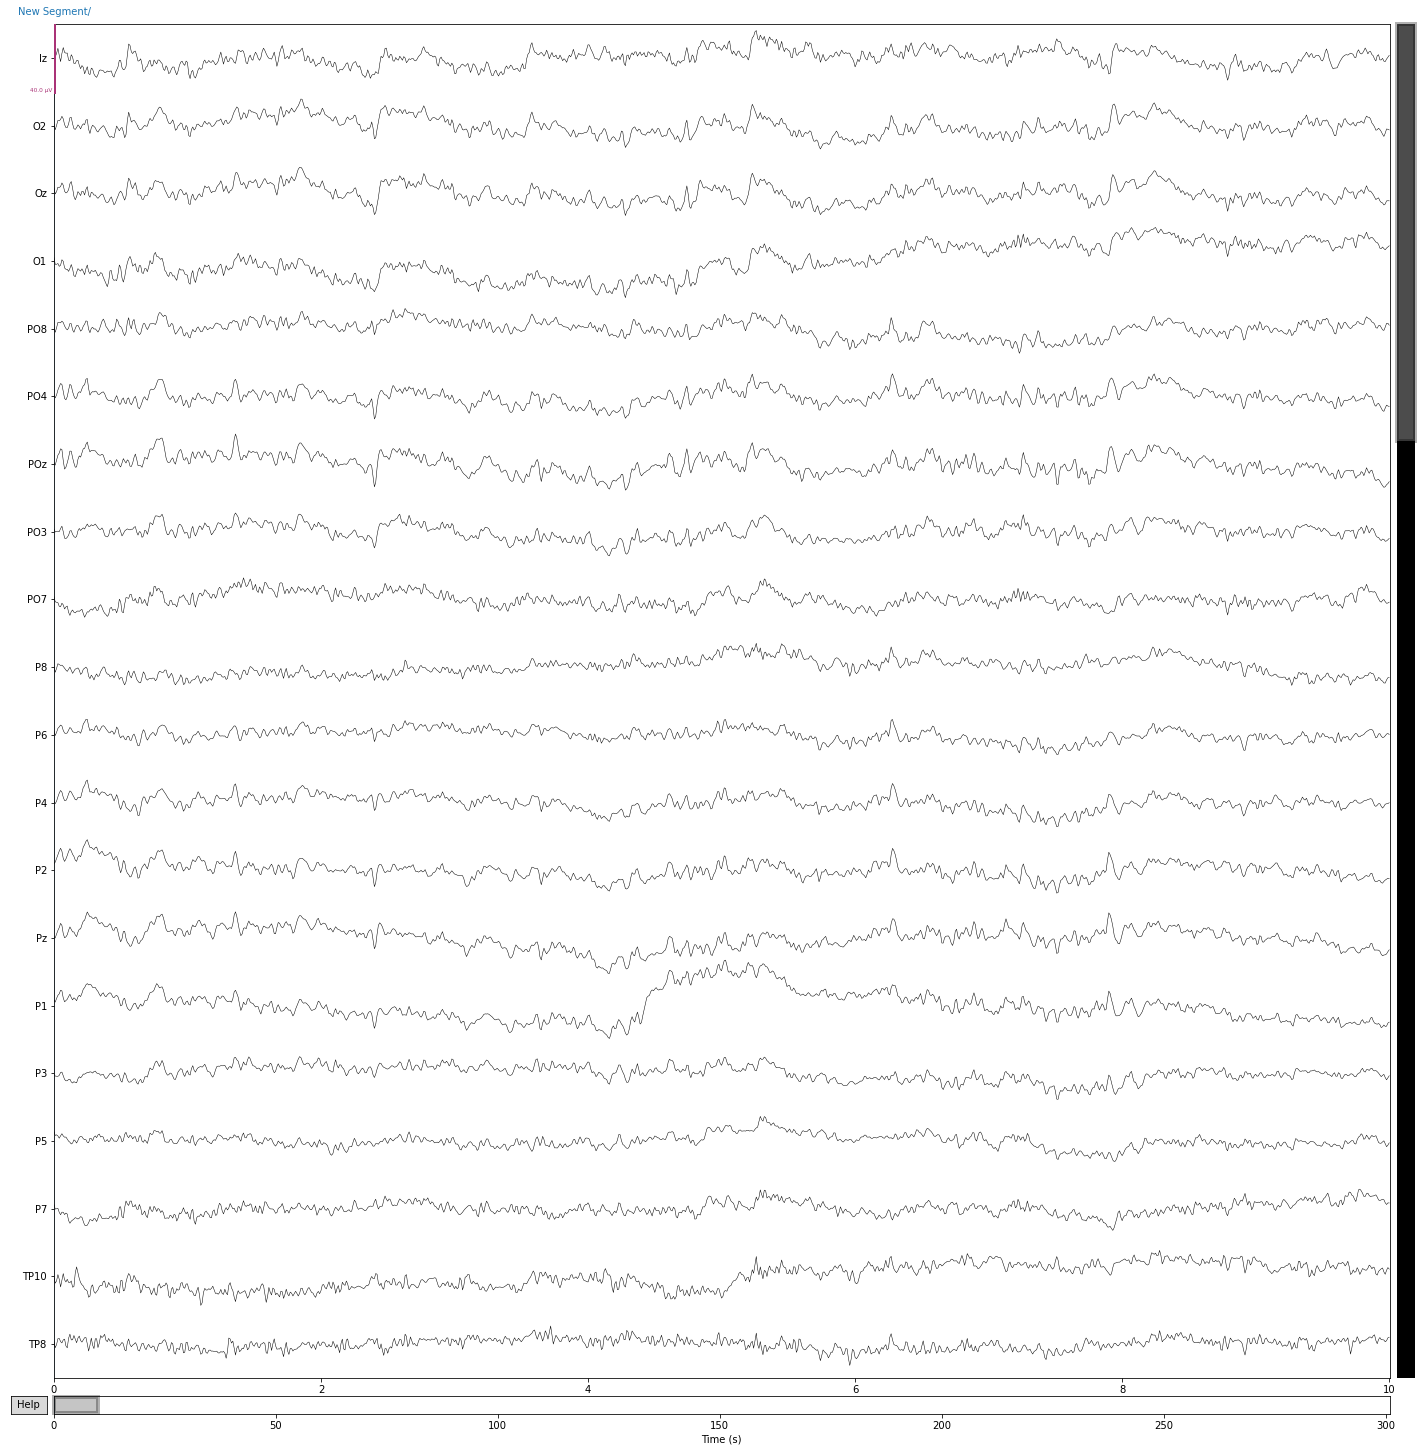

In [14]:
# Applying reconstructed data eye open state
ica_eo.apply(reconst_raw_eo, exclude = ica_eo.exclude).plot()

In [15]:
# Fit ICA on eye closed state
ica_ec = mne.preprocessing.ICA(n_components=ica_n_components,random_state=random_state)

reconst_raw_ec = raw_ec_filt.copy()

ica_ec.fit(reconst_raw_ec, picks=picks_ec)

Method,fastica
Fit,871 iterations on raw data (151580 samples)
ICA components,4
Explained variance,99.1 %
Available PCA components,62
Channel types,eeg
ICA components marked for exclusion,—


In [ ]:
ica_ec.plot_sources(reconst_raw_ec)

In [16]:
ica_ec.exclude = [0,1]

# # find which ICs match the EOG pattern
# eog_indices, eog_scores = ica_eo.find_bads_eog(reconst_raw_eo)
# ica_eo.exclude = eog_indices
ica_ec.exclude

[0, 1]

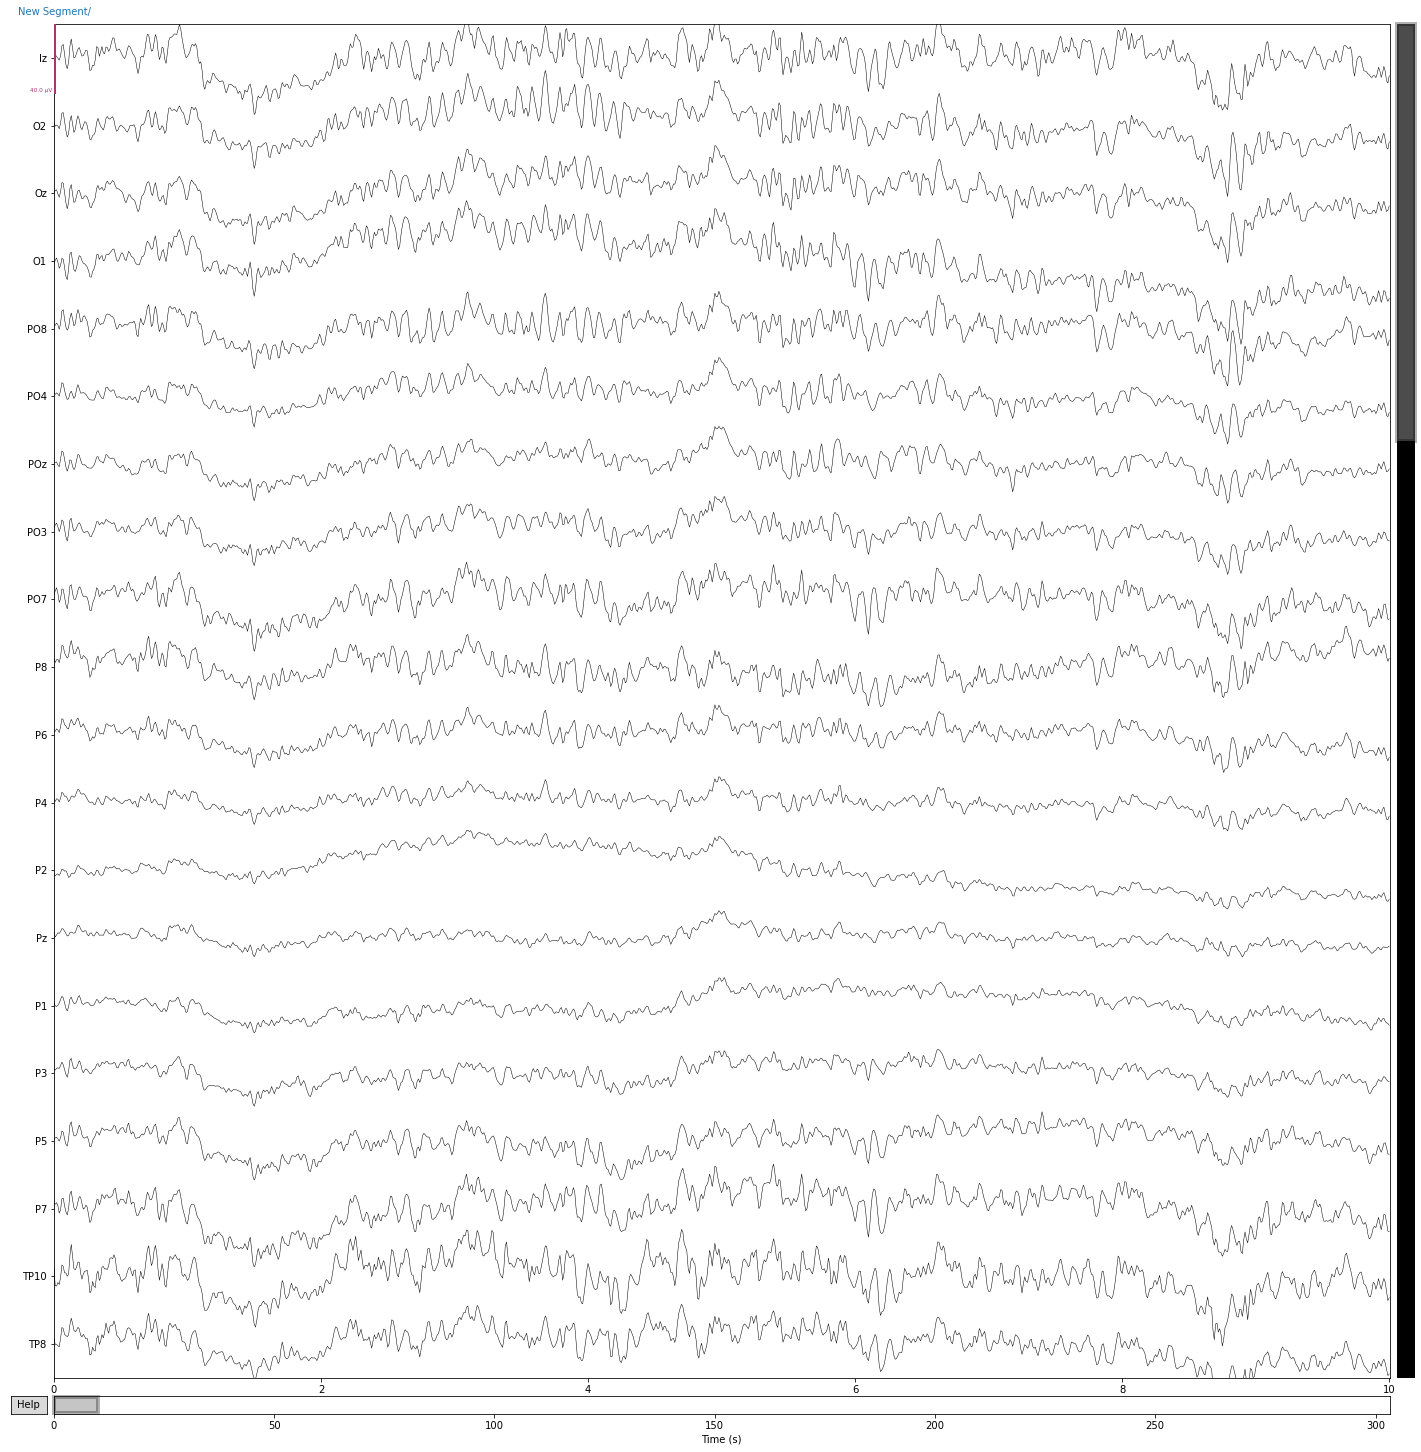

In [17]:
ica_ec.apply(reconst_raw_ec, exclude = ica_ec.exclude).plot()

In [ ]:
reconst_raw_ec.plot(n_channels = 62)

In [18]:
# Fit ICA on sedition 1 state data
ica_sed_1 = mne.preprocessing.ICA(n_components=ica_n_components,random_state=random_state)

reconst_raw_sed_1 = raw_sed_1_filt.copy()

ica_sed_1.fit(reconst_raw_sed_1, picks=picks_sed_1)

Method,fastica
Fit,14 iterations on raw data (578140 samples)
ICA components,8
Explained variance,99.1 %
Available PCA components,62
Channel types,eeg
ICA components marked for exclusion,—


In [ ]:
ica_sed_1.plot_sources(reconst_raw_sed_1)

In [19]:
ica_sed_1.exclude = [0,1,2,3,4,5,6,7]

ica_sed_1.exclude

[0, 1, 2, 3, 4, 5, 6, 7]

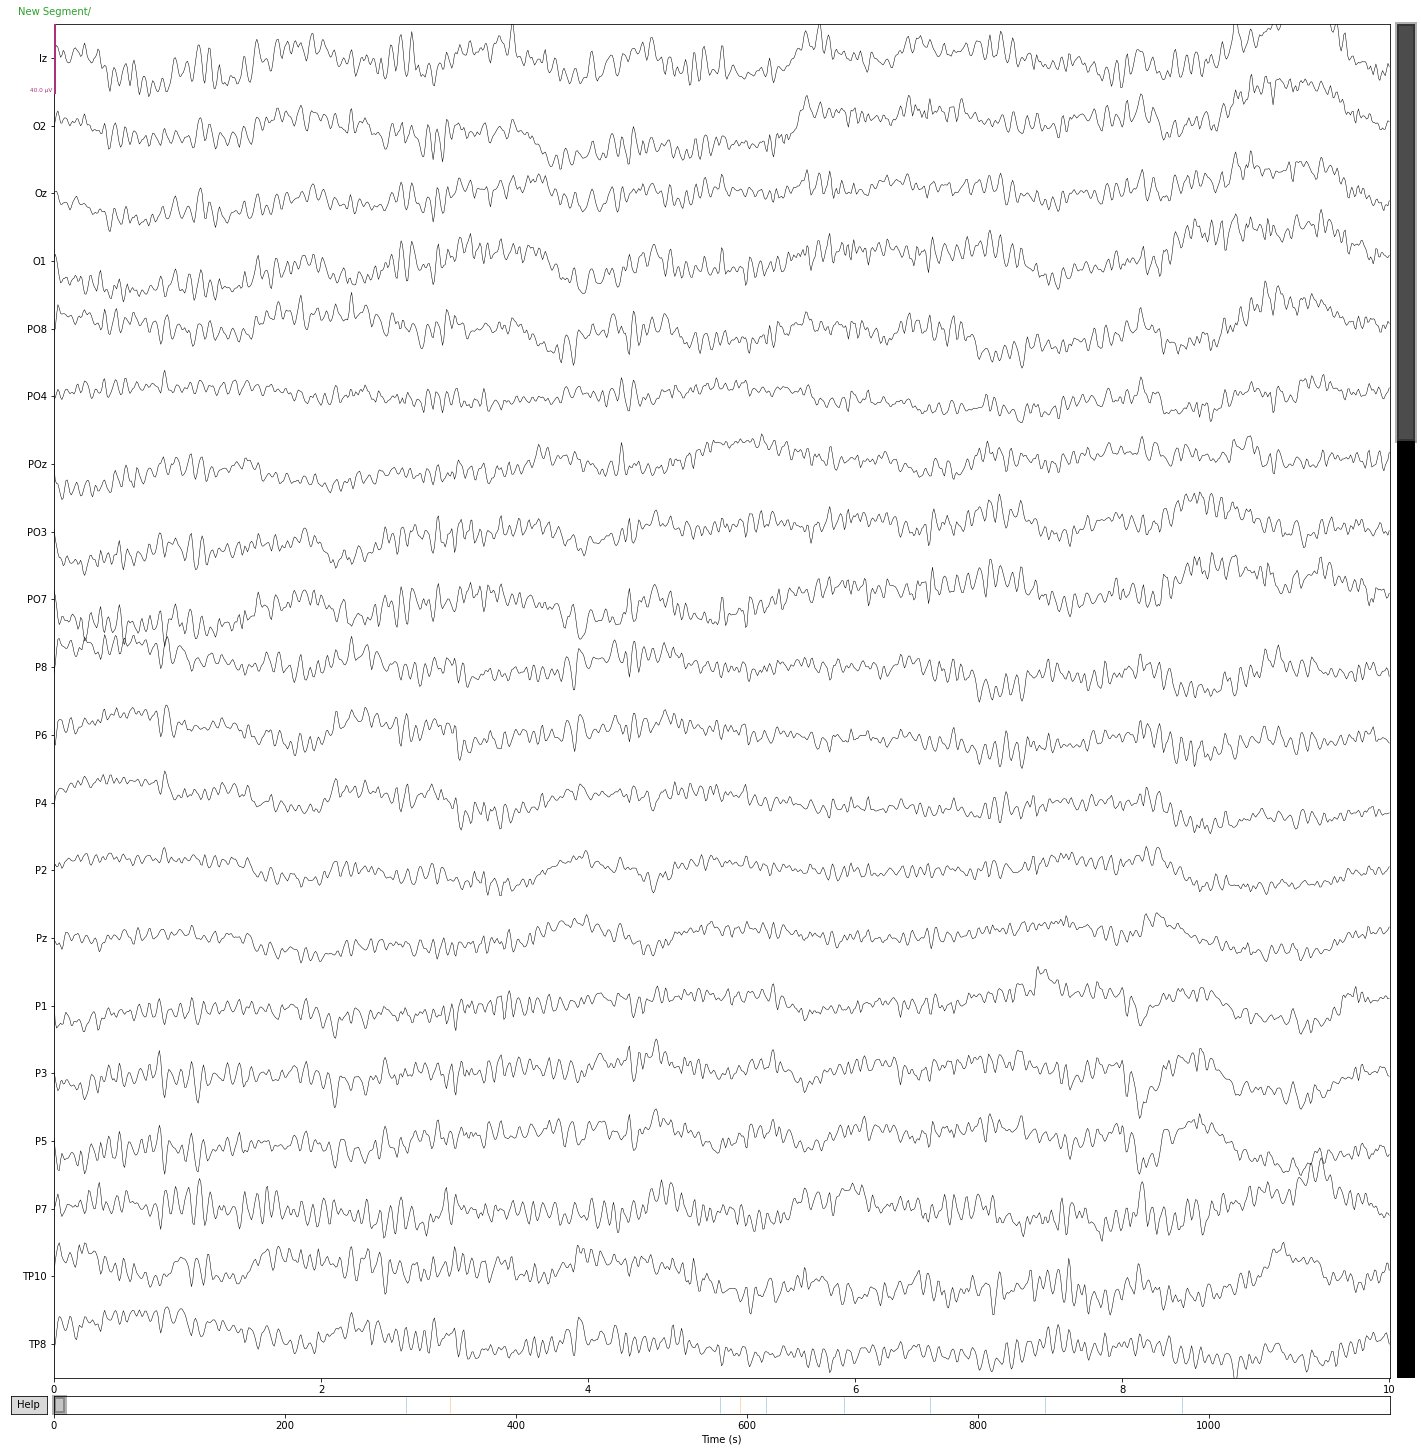

In [20]:
ica_sed_1.apply(reconst_raw_sed_1, exclude = ica_sed_1.exclude).plot()

In [ ]:
reconst_raw_sed_1.plot(n_channels = 62)

In [21]:
# Fit ICA for sedition 2 state
ica_sed_2 = mne.preprocessing.ICA(n_components=ica_n_components,random_state=random_state)

reconst_raw_sed_2 = raw_sed_2_filt.copy()

ica_sed_2.fit(reconst_raw_sed_2, picks=picks_sed_2)

Method,fastica
Fit,25 iterations on raw data (298820 samples)
ICA components,19
Explained variance,99.1 %
Available PCA components,62
Channel types,eeg
ICA components marked for exclusion,—


In [ ]:
ica_sed_2.plot_sources(reconst_raw_sed_2)

In [22]:
ica_sed_2.exclude = [0,1,2,3,4,5,6,10,12,14,18]

ica_sed_2.exclude

[0, 1, 2, 3, 4, 5, 6, 10, 12, 14, 18]

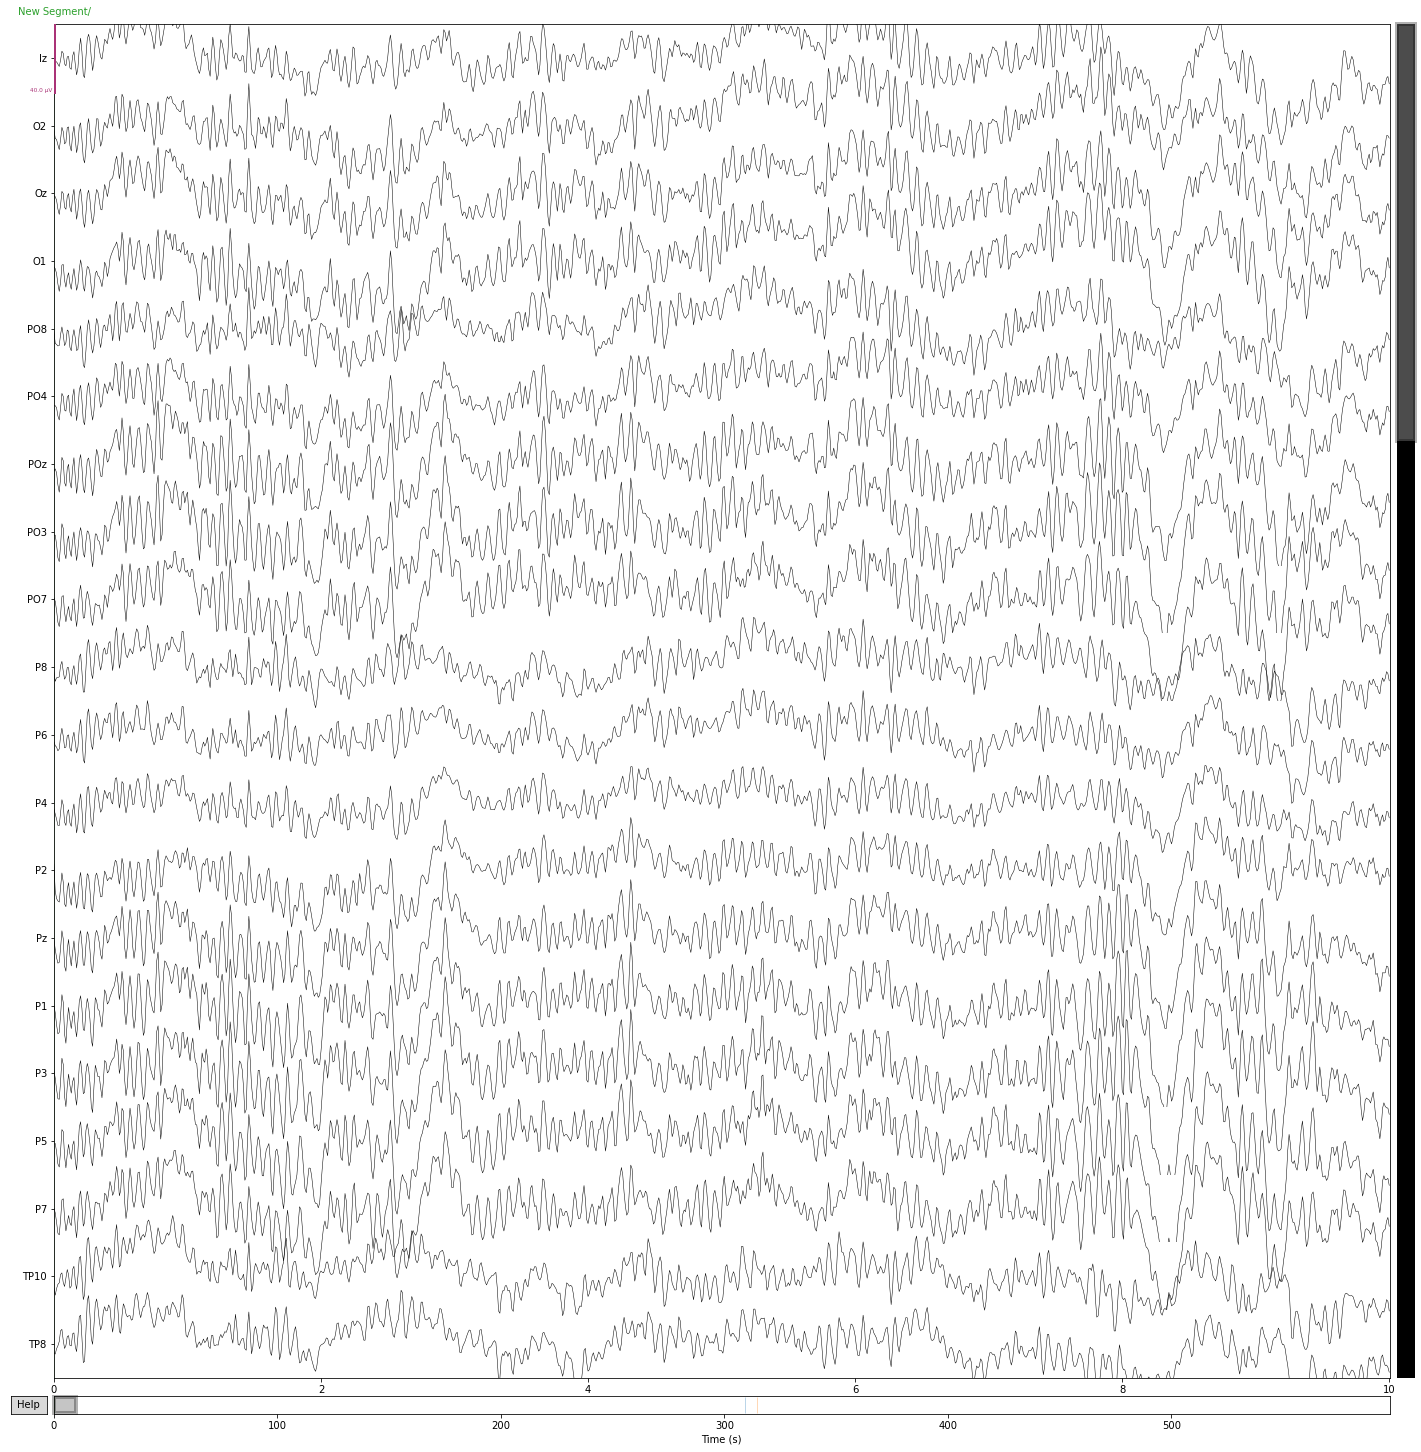

In [23]:
ica_sed_2.apply(reconst_raw_sed_2, exclude = ica_sed_2.exclude).plot()

In [24]:
# Fit ICA for sedition state 3 data
ica_sed_3 = mne.preprocessing.ICA(n_components=ica_n_components,random_state=random_state)

reconst_raw_sed_3 = raw_sed_3_filt.copy()

ica_sed_3.fit(reconst_raw_sed_3, picks=picks_sed_3)

Method,fastica
Fit,28 iterations on raw data (246060 samples)
ICA components,14
Explained variance,99.1 %
Available PCA components,62
Channel types,eeg
ICA components marked for exclusion,—


In [ ]:
ica_sed_3.plot_sources(reconst_raw_sed_3)

In [25]:
ica_sed_3.exclude = [0,1,2,3,4,5,6,7,8,9,13]

ica_sed_3.exclude

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13]

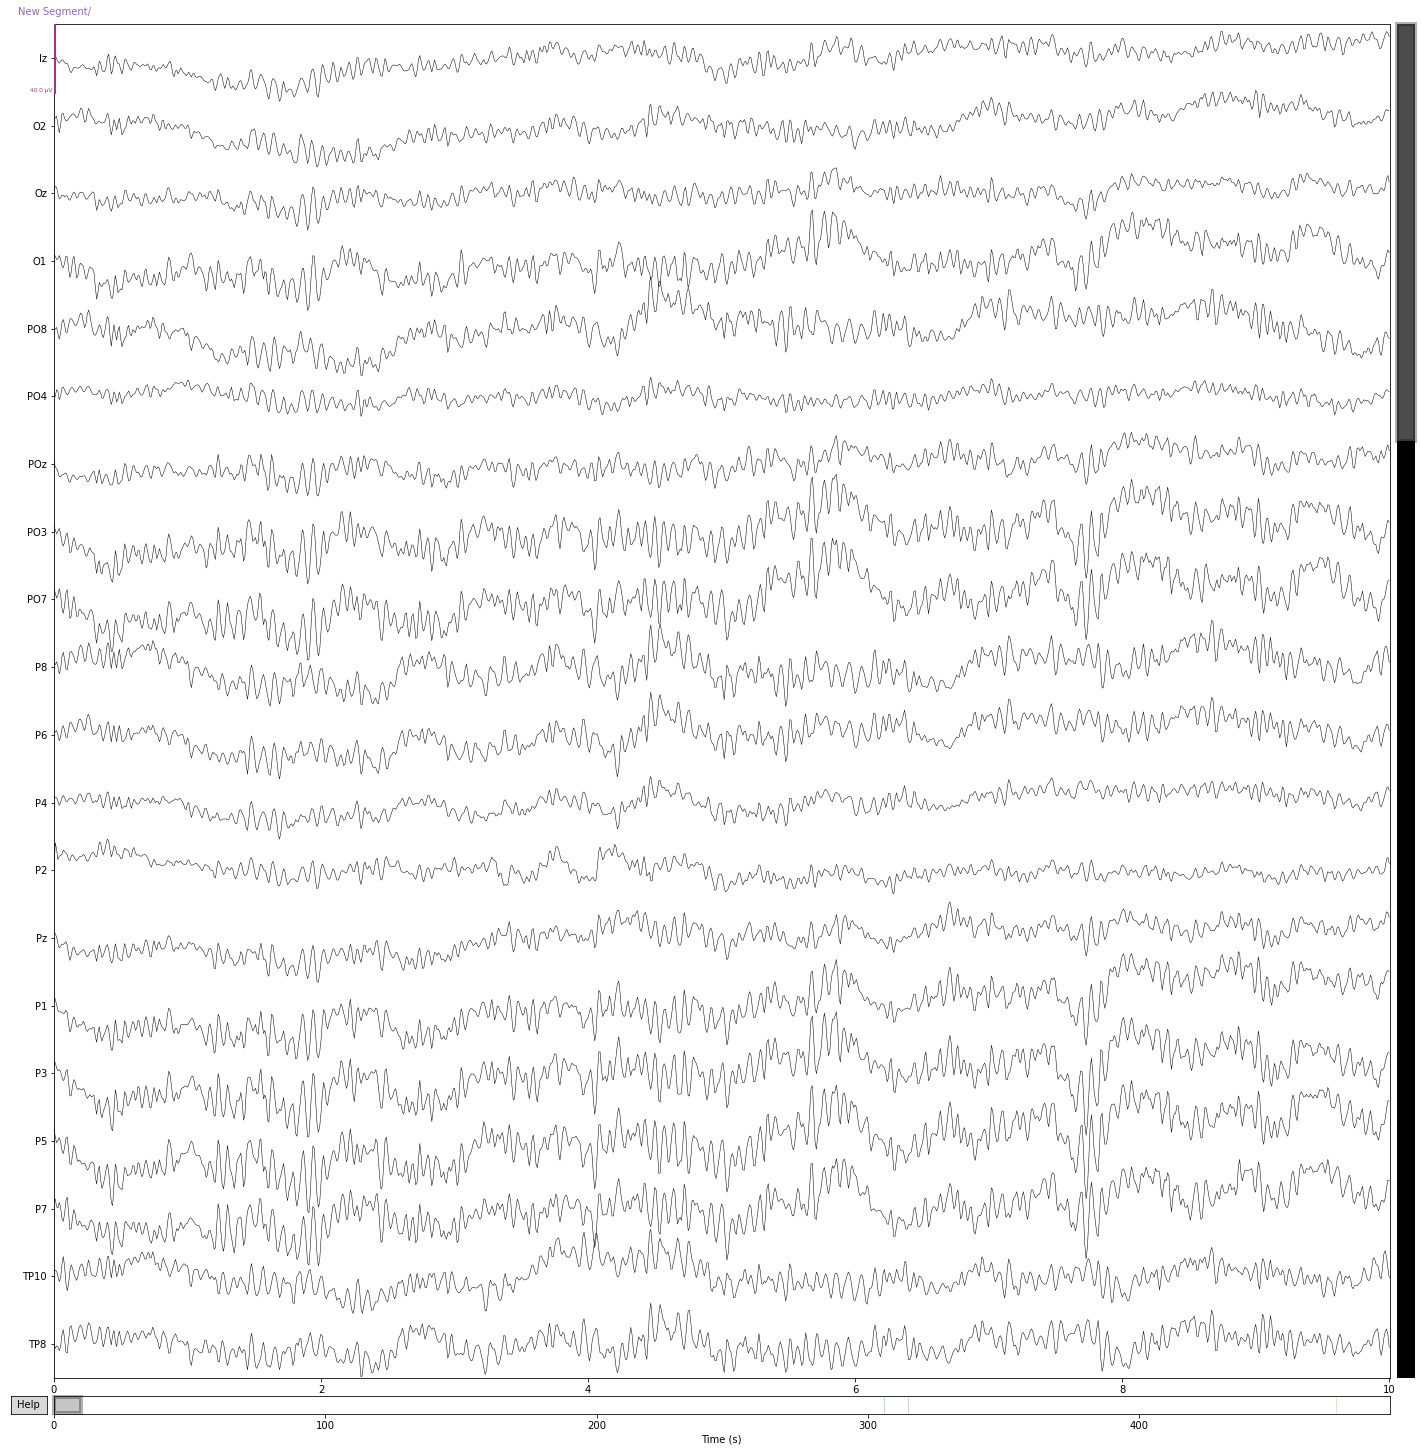

In [26]:
ica_sed_3.apply(reconst_raw_sed_3, exclude = ica_sed_3.exclude).plot()

In [ ]:
ica_eo.plot_components(outlines = 'skirt')

In [ ]:
ica_ec.plot_components(outlines = 'skirt')

In [ ]:
ica_sed_1.plot_components(outlines = 'skirt')

In [ ]:
ica_sed_2.plot_components(outlines = 'skirt')

In [ ]:
ica_sed_3.plot_components(outlines = 'skirt')

In [ ]:
ica_hi_cut  = 30

In [ ]:
ica_eo.plot_properties(raw_eo_filt, picks=range(0, ica_eo.n_components_), psd_args={'fmax': ica_hi_cut});

In [ ]:
ica_ec.plot_properties(raw_ec_ica_epoch, picks=range(0, ica_ec.n_components_), psd_args={'fmax': ica_hi_cut});

In [ ]:
ica_sed_1.plot_properties(raw_sed_1_ica_epoch, picks=range(0, ica_sed_1.n_components_), psd_args={'fmax': ica_hi_cut});

In [ ]:
ica_sed_2.plot_properties(raw_sed_2_ica_epoch, picks=range(0, ica_sed_2.n_components_), psd_args={'fmax': ica_hi_cut});

In [ ]:
ica_sed_3.plot_properties(raw_sed_3_ica_epoch, picks=range(0, ica_sed_3.n_components_), psd_args={'fmax': ica_hi_cut});

In [ ]:
ica_z_thresh = 1.96 
eog_indices, eog_scores = ica_eo.find_bads_eog(reconst_raw_eo, ch_name=['VEOG', 'HEOG', 'EMG'], threshold=ica_z_thresh)
ica_eo.exclude = eog_indices

ica_eo.plot_scores(eog_scores)

In [ ]:
ica_eo.plot_sources(raw_eo_filt)

In [ ]:
ica_sed_1.plot_sources(raw_sed_1_filt)

In [ ]:
ica_eo.plot_properties(raw_eo_filt, picks=range(0, ica_eo.n_components_));

In [ ]:
ica_sed_1.exclude = []

# find which ICs match the EOG pattern
eog_indices, eog_scores = ica_sed_1.find_bads_eog(reconst_raw_sed_1)
ica_sed_1.exclude = eog_indices
ica_sed_1.exclude

In [ ]:
# barplot of ICA component "EOG match" scores
ica_eo.plot_scores(eog_scores)

In [ ]:
# barplot of ICA component "EOG match" scores
ica_sed_1.plot_scores(eog_scores)

In [ ]:
eog_indices, eog_scores = ica_eo.find_bads_eog(reconst_raw_eo, ch_name=['VEOG', 'HEOG'], threshold=ica_z_thresh)
ica_eo.exclude = eog_indices
ica_eo.exclude

ica_eo.plot_scores(eog_scores)

In [ ]:
eog_indices, eog_scores = ica_sed_2.find_bads_eog(raw_sed_2_ica, ch_name=['VEOG', 'HEOG'], threshold=ica_z_thresh)
ica_sed_2.exclude = eog_indices

ica_sed_2.plot_scores(eog_scores)

In [ ]:
eog_indices, eog_scores = ica_sed_3.find_bads_eog(raw_sed_3_ica, ch_name=['VEOG', 'HEOG'], threshold=ica_z_thresh)
ica_sed_3.exclude = eog_indices

ica_sed_3.plot_scores(eog_scores)

In [ ]:
ica_eo.save('ane_SD_EMG_1010-eo-ica.fif',overwrite=True);

In [ ]:
ica_sed_1.save('ane_SD_EMG_1010-sed-1-ica.fif',overwrite=True);

In [ ]:
ica_sed_2.save('ane_SD_EMG_1010-sed-2-ica.fif',overwrite=True);

In [ ]:
ica_sed_3.save('ane_SD_EMG_1010-sed-3-ica.fif',overwrite=True);

In [ ]:
events_eo, event_id_eo = mne.events_from_annotations(reconst_raw_eo)

In [ ]:
events_ec, event_id_ec = mne.events_from_annotations(reconst_raw_ec)

In [ ]:
events_sed_1, event_id_sed_1 = mne.events_from_annotations(reconst_raw_sed_1)

In [ ]:
events_sed_2, event_id_sed_2 = mne.events_from_annotations(reconst_raw_sed_2)

In [ ]:
events_sed_3, event_id_sed_3 = mne.events_from_annotations(reconst_raw_sed_3)

In [ ]:
events_eo,events_ec,events_sed_1,events_sed_2,events_sed_3

In [ ]:
event_id_eo,event_id_ec,event_id_sed_1,event_id_sed_2,event_id_sed_3

In [ ]:
# Epoching settings
tmin =  0  # start of each epoch (in sec)
tmax =  3 # end of each epoch (in sec)

# Create epochs
epochs_eo = mne.Epochs(reconst_raw_eo,
                    events_eo, event_id_eo,
                    tmin, tmax,
                    baseline=None, 
                    preload=True
                   )

epochs_ec = mne.Epochs(reconst_raw_ec,
                    events_ec, event_id_ec,
                    tmin, tmax,
                    baseline=None, 
                    preload=True
                   )

epochs_sed_1 = mne.Epochs(reconst_raw_sed_1,
                    events_sed_1, event_id_sed_1,
                    tmin, tmax,
                    baseline=None, 
                    preload=True
                   )

epochs_sed_2 = mne.Epochs(reconst_raw_sed_2,
                    events_sed_2, event_id_sed_2,
                    tmin, tmax,
                    baseline=None, 
                    preload=True
                   )

epochs_sed_3 = mne.Epochs(reconst_raw_sed_3,
                    events_sed_3, event_id_sed_3,
                    tmin, tmax,
                    baseline=None, 
                    preload=True
                   )

In [ ]:
for epoch in epochs_sed_1[:10]:
    print(type(epoch))

In [ ]:
for index in range(10):
    print(type(epochs_sed_1[index]))

In [ ]:
epochs_eo_train = epochs_eo.copy().crop(tmin=1., tmax=3.)

In [ ]:
epochs_sed_1_train = epochs_sed_1.copy().crop(tmin=1., tmax=2.)

In [ ]:
epochs_sed_2_train = epochs_sed_2.copy().crop(tmin=1., tmax=2.)

In [ ]:
epochs_sed_3_train = epochs_sed_3.copy().crop(tmin=1., tmax=2.)

In [ ]:
labels_eo = epochs_eo.events[:, -1] - 2

In [ ]:
labels_eo

In [ ]:
labels_sed_1 = epochs_sed_1.events[:, -1] - 2

In [ ]:
labels_sed_1[0]

In [ ]:
labels_sed_2 = epochs_sed_2.events[:, -1] - 2

In [ ]:
labels_sed_2[0]

In [ ]:
labels_sed_3 = epochs_sed_3.events[:, -1] - 2

In [ ]:
labels_sed_3[0]

In [113]:
# Creating fixed length epochs of 5 seconds.
epochs_eo = mne.make_fixed_length_epochs(reconst_raw_eo, duration=1.5, overlap= 0.75, preload=False)
epochs_ec = mne.make_fixed_length_epochs(reconst_raw_ec, duration=1.5, overlap= 0.75, preload=False)
epochs_sed_1 = mne.make_fixed_length_epochs(reconst_raw_sed_1, duration=1.5, overlap= 0.75, preload=False)
epochs_sed_2 = mne.make_fixed_length_epochs(reconst_raw_sed_2, duration=1.5, overlap= 0.75, preload=False)
epochs_sed_3 = mne.make_fixed_length_epochs(reconst_raw_sed_3, duration=1.5, overlap= 0.75, preload=False)

In [123]:
# Fetching psd data from each epoch and only pick 'eeg' channels
eo_psd_data, eo_freqs = mne.time_frequency.psd_welch(epochs_eo, fmin=0, fmax=30, picks ='eeg')
ec_psd_data, ec_freqs = mne.time_frequency.psd_welch(epochs_ec, fmin=0, fmax=30, picks ='eeg')
sed_1_psd_data, sed_1_freqs = mne.time_frequency.psd_welch(epochs_sed_1, fmin=0, fmax=30, picks ='eeg')
sed_2_psd_data, sed_2_freqs = mne.time_frequency.psd_welch(epochs_sed_2, fmin=0, fmax=30, picks ='eeg')
sed_3_psd_data, sed_3_freqs = mne.time_frequency.psd_welch(epochs_sed_3, fmin=0, fmax=30, picks ='eeg')

In [124]:
# returned psds will be of shape (n_epochs, n_channels, n_freqs)
eo_psd_data.shape,ec_psd_data.shape,sed_1_psd_data.shape,sed_2_psd_data.shape,sed_3_psd_data.shape

((400, 62, 16), (403, 62, 16), (1540, 62, 16), (795, 62, 16), (655, 62, 16))

In [125]:
eo_freqs, ec_freqs, sed_1_freqs, sed_2_freqs, sed_3_freqs

(array([ 0.      ,  1.953125,  3.90625 ,  5.859375,  7.8125  ,  9.765625,
        11.71875 , 13.671875, 15.625   , 17.578125, 19.53125 , 21.484375,
        23.4375  , 25.390625, 27.34375 , 29.296875]),
 array([ 0.      ,  1.953125,  3.90625 ,  5.859375,  7.8125  ,  9.765625,
        11.71875 , 13.671875, 15.625   , 17.578125, 19.53125 , 21.484375,
        23.4375  , 25.390625, 27.34375 , 29.296875]),
 array([ 0.      ,  1.953125,  3.90625 ,  5.859375,  7.8125  ,  9.765625,
        11.71875 , 13.671875, 15.625   , 17.578125, 19.53125 , 21.484375,
        23.4375  , 25.390625, 27.34375 , 29.296875]),
 array([ 0.      ,  1.953125,  3.90625 ,  5.859375,  7.8125  ,  9.765625,
        11.71875 , 13.671875, 15.625   , 17.578125, 19.53125 , 21.484375,
        23.4375  , 25.390625, 27.34375 , 29.296875]),
 array([ 0.      ,  1.953125,  3.90625 ,  5.859375,  7.8125  ,  9.765625,
        11.71875 , 13.671875, 15.625   , 17.578125, 19.53125 , 21.484375,
        23.4375  , 25.390625, 27.34375 , 29.

In [126]:
X_eo = eo_psd_data.data
X_ec =  ec_psd_data.data
X_sed_1 = sed_1_psd_data.data
X_sed_2 = sed_2_psd_data.data
X_sed_3 = sed_3_psd_data.data

In [127]:
#feat_col_X_eo = eo_psd_data.reshape(39,62*16)
feat_col_X_eo = eo_psd_data.reshape(400,-1)

#feat_col_X_ec = ec_psd_data.reshape(59,62*16)
feat_col_X_ec = ec_psd_data.reshape(403,-1)

#feat_col_X_sed_1 = sed_1_psd_data.reshape(230,62*16)
feat_col_X_sed_1 = sed_1_psd_data.reshape(1540,-1)

#feat_col_X_sed_2 = sed_2_psd_data.reshape(118,62*16)
feat_col_X_sed_2 = sed_2_psd_data.reshape(795,-1)

#feat_col_X_sed_3 = sed_3_psd_data.reshape(65,62*16)
feat_col_X_sed_3 = sed_3_psd_data.reshape(655,-1)

In [128]:
feat_col_X_eo.shape,feat_col_X_ec.shape,feat_col_X_sed_1.shape,feat_col_X_sed_2.shape,feat_col_X_sed_3.shape

((400, 992), (403, 992), (1540, 992), (795, 992), (655, 992))

In [129]:
types_eo = np.zeros(shape=(400, 1), dtype='int')
types_ec = np.zeros(shape=(403, 1), dtype='int')
types_sed_1 = np.zeros(shape=(1540, 1), dtype='int')
types_sed_2 = np.zeros(shape=(795, 1), dtype='int')
types_sed_3 = np.zeros(shape=(655, 1), dtype='int')

In [130]:
eyes_open_df = pd.DataFrame(feat_col_X_eo)
eyes_closed_df = pd.DataFrame(feat_col_X_ec)
sed_1_df = pd.DataFrame(feat_col_X_sed_1)
sed_2_df = pd.DataFrame(feat_col_X_sed_2)
sed_3_df = pd.DataFrame(feat_col_X_sed_3)

In [131]:
eyes_open_df['target'] = types_eo

eyes_closed_df['target'] = types_ec
eyes_closed_df['target'] = 1

sed_1_df['target'] = types_sed_1
sed_1_df['target'] = 2

sed_2_df['target'] = types_sed_2
sed_2_df['target'] = 2

sed_3_df['target'] = types_sed_3
sed_3_df['target'] = 2

In [ ]:
eyes_open_df

In [ ]:
eyes_closed_df

In [ ]:
sed_1_df

In [ ]:
sed_2_df

In [ ]:
sed_3_df

In [132]:
merged_eo_ec_df = pd.concat([eyes_open_df,eyes_closed_df])

In [133]:
merged_eo_ec_df

,0,1,2,3,4,5,6,7,8,9,...,983,984,985,986,987,988,989,990,991,target
0,3.784758e-13,3.119674e-12,4.847971e-13,6.377836e-13,3.550802e-14,5.723355e-14,1.412206e-13,8.310494e-14,8.315307e-14,9.353153e-14,...,1.911337e-13,3.943937e-13,2.479691e-13,1.135125e-13,1.984287e-13,1.061068e-13,2.030424e-14,9.597643e-14,3.639885e-13,0
1,2.599984e-13,5.218686e-13,5.235536e-13,1.200581e-12,3.454445e-13,2.595295e-13,2.598342e-13,1.527620e-13,1.722134e-13,1.160283e-13,...,1.286751e-13,4.131560e-13,2.388199e-13,6.587688e-14,1.770998e-14,4.752131e-14,3.820641e-14,6.960461e-14,1.481322e-13,0
2,4.462109e-13,9.734312e-13,1.110831e-12,3.257597e-13,2.330208e-13,2.431897e-13,2.442458e-13,4.519251e-13,2.867278e-13,9.176783e-14,...,1.634552e-13,3.653802e-14,1.491141e-14,1.859908e-13,1.551288e-13,6.949441e-14,5.197460e-14,6.634260e-14,1.263637e-13,0
3,2.643439e-13,2.983465e-12,1.739024e-12,8.466420e-13,4.882797e-13,2.026584e-13,9.402815e-14,4.572347e-14,1.078112e-13,6.406795e-14,...,1.025289e-13,2.606373e-13,2.791259e-13,2.962149e-13,2.082705e-13,9.644866e-14,2.050382e-14,4.656815e-14,7.367333e-14,0
4,6.614228e-14,4.939202e-13,2.241545e-13,3.268823e-13,1.885902e-13,2.008152e-13,2.223759e-13,1.238721e-13,3.355573e-14,7.652873e-14,...,3.795970e-14,5.967847e-14,1.493251e-13,3.460064e-13,1.514478e-13,3.501495e-14,7.153916e-14,2.529810e-14,3.648480e-14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,5.767230e-14,8.771897e-13,2.537009e-12,4.714517e-12,2.888598e-13,4.661744e-13,7.687226e-13,4.699383e-13,6.979966e-13,1.357924e-13,...,7.260964e-14,9.032014e-14,3.585943e-14,1.813841e-14,3.178705e-15,4.004846e-13,3.540790e-13,3.772989e-13,3.686674e-13,1
399,1.569422e-12,6.358700e-12,3.346887e-12,2.402838e-12,1.565991e-12,6.571199e-13,6.306260e-13,1.442896e-13,1.414563e-13,2.062537e-13,...,9.845349e-15,9.452855e-14,2.347785e-13,3.258239e-13,2.205875e-13,5.671093e-13,7.233558e-13,4.299197e-13,1.170179e-13,1
400,1.773383e-13,1.388528e-12,6.512374e-13,1.657213e-12,4.926270e-13,4.855506e-13,4.417990e-13,9.862679e-14,4.374900e-13,6.284533e-13,...,1.040219e-13,3.128686e-14,4.202967e-14,3.100992e-14,3.096606e-14,1.864177e-13,1.102966e-13,9.648220e-14,1.126551e-13,1
401,3.056714e-13,6.704389e-12,2.458299e-12,2.864196e-12,8.937369e-13,1.866255e-12,1.044737e-12,9.167838e-13,1.422659e-12,1.914842e-12,...,1.494393e-14,1.028705e-14,2.009909e-14,7.865977e-14,8.161763e-14,1.170903e-13,8.007234e-14,6.919823e-14,9.596075e-14,1


In [134]:
merged_eo_ec_df['target'].value_counts()

1    403
0    400
Name: target, dtype: int64

In [135]:
merged_sed_1_2_3_df = pd.concat([sed_1_df,sed_2_df,sed_3_df])

In [136]:
merged_eo_sed_df = pd.concat([eyes_open_df,merged_sed_1_2_3_df])

In [ ]:
merged_eo_sed_df

In [137]:
merged_ec_sed_df = pd.concat([eyes_closed_df,merged_sed_1_2_3_df])

In [138]:
X_eo_ec = merged_eo_ec_df.values[:, :-1]
X_eo_sed = merged_eo_sed_df.values[:, :-1]
X_ec_sed = merged_ec_sed_df.values[:, :-1]

In [ ]:
# trans_scaler = MinMaxScaler()
# X_eo_sed = trans_scaler.fit_transform(X_eo_sed)
# X_eo_ec = trans_scaler.fit_transform(X_eo_ec)

In [139]:
y_eo_sed =  merged_eo_sed_df['target']
y_eo_ec = merged_eo_ec_df['target']
y_ec_sed = merged_ec_sed_df['target']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_eo_ec, y_eo_ec, test_size=0.3, random_state = 42)

# KNN classifier

In [141]:
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.983402489626556

In [142]:
y_base_pred = knn_clf.predict(X_test)

In [143]:
test_accuracy_knn = accuracy_score(y_test,y_base_pred)*100

print("KKN accuracy for testing dataset without hyper parameter tuning is : {:.2f}%".format(test_accuracy_knn) )

KKN accuracy for testing dataset without hyper parameter tuning is : 98.34%


In [144]:
cf_matrix_knn = confusion_matrix(y_test, y_base_pred)
print(cf_matrix_knn)

[[123   2]
 [  2 114]]


In [145]:
print(classification_report(y_test, y_base_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       125
           1       0.98      0.98      0.98       116

    accuracy                           0.98       241
   macro avg       0.98      0.98      0.98       241
weighted avg       0.98      0.98      0.98       241



In [ ]:
knn_grid = KNeighborsClassifier()

cross_val = StratifiedKFold(n_splits=10)

k_range = list(range(1, 31))
param_grid = {'n_neighbors': k_range, 
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']              
             }

# defining parameter range
grid_knn = GridSearchCV(knn_grid, param_grid, cv=cross_val, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search_clf = grid_knn.fit(X_train, y_train)

# LDA classifier

In [146]:
# define model
lda_clf = LDA()

# fit model
lda_clf.fit(X_train, y_train)

# make a prediction
y_pred_lda_clf = lda_clf.predict(X_test)

In [147]:
# evaluate predictions
test_accuracy_lda = accuracy_score(y_test, y_pred_lda_clf)
print("LDA Accuracy: %.2f%%" % (test_accuracy_lda * 100.0))

LDA Accuracy: 100.00%


In [148]:
cf_matrix_lda = confusion_matrix(y_test, y_pred_lda_clf)
print(cf_matrix_lda)

[[125   0]
 [  0 116]]


In [149]:
print(classification_report(y_test, y_pred_lda_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       116

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241



# GBM Classifier

In [113]:
model_gbm = GradientBoostingClassifier()
model_gbm.fit(X_train, y_train)

# make a prediction
y_pred_gbm = model_gbm.predict(X_test)

In [114]:
# Classification report
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       189
           1       0.48      1.00      0.65       173

    accuracy                           0.48       362
   macro avg       0.24      0.50      0.32       362
weighted avg       0.23      0.48      0.31       362



In [115]:
cf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
print(cf_matrix_gbm)

[[  0 189]
 [  0 173]]


# NB Classifier

In [150]:
gnb_clf = GaussianNB()

In [151]:
gnb_clf.fit(X_train, y_train)

y_pred_gnb = gnb_clf.predict(X_test)

In [152]:
# Classification report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       125
           1       0.99      1.00      1.00       116

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241



In [153]:
cf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
print(cf_matrix_gnb)

[[124   1]
 [  0 116]]


In [154]:
test_accuracy_gnb = accuracy_score(y_test,y_pred_gnb)*100
print("Naive Bayes classifier accuracy for testing dataset is : {:.2f}%".format(test_accuracy_gnb))

Naive Bayes classifier accuracy for testing dataset is : 99.59%


# Logistic Regression Classification

In [85]:
clf = LogisticRegression()

clf.fit(X_train,y_train)

LogisticRegression()

In [86]:
# Classification report
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       202
           2       0.87      1.00      0.93      1326

    accuracy                           0.87      1528
   macro avg       0.43      0.50      0.46      1528
weighted avg       0.75      0.87      0.81      1528



In [87]:
test_accuracy = accuracy_score(y_test,y_pred)*100
print("Logistic Regression accuracy for testing dataset is : {:.2f}%".format(test_accuracy))

Logistic Regression accuracy for testing dataset is : 86.78%


In [88]:
cf_matrix_lr = confusion_matrix(y_test, y_pred)
print(cf_matrix_lr)

[[   0  202]
 [   0 1326]]


In [89]:
grid_params={"C":np.logspace(0, 4, 10), "penalty":["l1","l2"]}
cross_val = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)

lr_grid = LogisticRegression()

logreg_cv = GridSearchCV(lr_grid, grid_params, cv=cross_val)

In [90]:
logreg_cv.fit(X_train,y_train)

print("Logistic Regression tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Logistic Regression accuracy :",logreg_cv.best_score_)

Logistic Regression tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
Logistic Regression accuracy : 0.886957479621062


# XG Boost Classification

In [ ]:
xgb_model = XGBClassifier()

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
xgb_model.fit(X_train, y_train)

In [ ]:
# make predictions for test data
y_xgb_pred = xgb_model.predict(X_test)

In [ ]:
# evaluate predictions
text_accuracy_xgb = accuracy_score(y_test, y_xgb_pred)
print("Accuracy: %.2f%%" % (text_accuracy_xgb * 100.0))

In [ ]:
cf_matrix_xgb = confusion_matrix(y_test, y_pred)
print(cf_matrix_xgb)

In [ ]:
# defining parameter range
param_grid_xgb = {"subsample":[0.5, 0.75, 1],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[2, 6, 12],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[100]}

cross_val = StratifiedKFold(n_splits=10)
model_grid = XGBClassifier(n_estimators=100, n_jobs=-1)
 
grid_xgb = GridSearchCV(model_grid, param_grid_xgb, refit = True, verbose = 3, cv = cross_val)
 
# fitting the model for grid search
grid_xgb.fit(X_train, y_train)

# Random Forest Classification

In [ ]:
#Random Forest Classifier
clf_rf = RandomForestClassifier(max_depth=10, n_estimators=100)

#cross_val_st = StratifiedKFold()

#Training the model
clf_rf.fit(X_train,y_train)

In [ ]:
y_rf_pred = clf_rf.predict(X_test)

In [ ]:
# evaluate predictions
text_accuracy_rf = accuracy_score(y_test, y_rf_pred)
print("Accuracy: %.2f%%" % (text_accuracy_rf * 100.0))

In [ ]:
cf_matrix_rf = confusion_matrix(y_test, y_pred)
print(cf_matrix_rf)

# SVM Classification

In [126]:
# train the model on train set
model_SVM = SVC()
model_SVM.fit(X_train, y_train)
 
# print prediction results
y_pred_svm = model_SVM.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96       202
           2       0.99      1.00      0.99      1326

    accuracy                           0.99      1528
   macro avg       0.99      0.96      0.98      1528
weighted avg       0.99      0.99      0.99      1528



In [127]:
test_accuracy_svm = accuracy_score(y_test,y_pred_svm)*100

print("SVM accuracy for testing dataset : {:.2f}%".format(test_accuracy_svm) )

SVM accuracy for testing dataset : 98.95%


In [128]:
cf_matrix_svm = confusion_matrix(y_test, y_pred)
print(cf_matrix_svm)

[[   0  202]
 [   0 1326]]


# 1D CNN classification

In [ ]:
def build_model():
    model = keras.models.Sequential()
    model.add(Conv1D(384, kernel_size=3, input_shape=X_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(32, kernel_size=3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Flatten()) 
    model.add(Dense(1))
    model.add(Activation("sigmoid"))
    model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
                  loss=BinaryCrossentropy(label_smoothing=0.0921),
                  metrics=[tf.keras.metrics.AUC(name = 'auc'), "accuracy"])
    return model

In [ ]:
model = build_model()
model.fit(x=X_train, y=y_train,
          epochs=25, batch_size=2048,
          callbacks=[tf.keras.callbacks.EarlyStopping('val_auc', mode='max',patience=3)],
          validation_data=(X_test, y_test))

In [ ]:
model.fit(df_train.values.reshape(-1, df_pred.shape[1], 1), Y,
          epochs=3,
          batch_size=1024)

In [ ]:
pd.DataFrame({
    'encounter_id': unlabeled['encounter_id'].values,
    'diabetes_mellitus': model.predict_proba(
        df_pred.values.reshape(-1, df_pred.shape[1], 1)).flatten()
             }).to_csv('./Prediction_with_CNN1D.csv',index=False)

# LSTM Classification

In [ ]:
# create the model
embedding_vecor_length = 32

lstm_model = Sequential()

#lstm_model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(1, activation='sigmoid'))

In [ ]:
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(lstm_model.summary())

In [ ]:
lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)